In [0]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.1/434.1 MB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyspark: filename=pyspark-4.0.0-py2.py3-none-any.whl size=434741244 sha256=b5f6222dadc4f4a8e60713b7c0050a43e076c46cc46c18f8b9effc9fdae5ccef
  Stored in directory: /home/spark-0441a81f-4069-4b22-af2e-9e/.cache/pip/wheels/91/e4/c1/3c917d48563ae77204dd185aa3da90da6a1a5526565296dadf
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Not uninstalling py4j at /databricks/python3/lib/python3.11/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-0441a81f-4069-4b22-af2e-9e92238af974
    Can't uninstall 'py4j'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts

In [0]:
from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName("EmployeeDataAnalysis").getOrCreate()

In [0]:
df = spark.read.option("header", True).option("inferSchema", True).csv("/Volumes/ai_ml/default/ai_ml/employees1.csv")
df.show()

+-----------+----------+---------+--------+------------+---------+----------+------+
|EMPLOYEE_ID|FIRST_NAME|LAST_NAME|   EMAIL|PHONE_NUMBER|HIRE_DATE|    JOB_ID|SALARY|
+-----------+----------+---------+--------+------------+---------+----------+------+
|        198|    Donald| OConnell|DOCONNEL|650.507.9833|21-Jun-07|  SH_CLERK|  2600|
|        199|   Douglas|    Grant|  DGRANT|650.507.9844|13-Jan-08|  SH_CLERK|  2600|
|        200|  Jennifer|   Whalen| JWHALEN|515.123.4444|17-Sep-03|   AD_ASST|  4400|
|        201|   Michael|Hartstein|MHARTSTE|515.123.5555|17-Feb-04|    MK_MAN| 13000|
|        202|       Pat|      Fay|    PFAY|603.123.6666|17-Aug-05|    MK_REP|  6000|
|        203|     Susan|   Mavris| SMAVRIS|515.123.7777|07-Jun-02|    HR_REP|  6500|
|        204|   Hermann|     Baer|   HBAER|515.123.8888|07-Jun-02|    PR_REP| 10000|
|        205|   Shelley|  Higgins|SHIGGINS|515.123.8080|07-Jun-02|    AC_MGR| 12008|
|        206|   William|    Gietz|  WGIETZ|515.123.8181|07-Jun-02

In [0]:
df.printSchema() 

root
 |-- EMPLOYEE_ID: integer (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- EMAIL: string (nullable = true)
 |-- PHONE_NUMBER: string (nullable = true)
 |-- HIRE_DATE: string (nullable = true)
 |-- JOB_ID: string (nullable = true)
 |-- SALARY: integer (nullable = true)



In [0]:
from pyspark.sql.functions import col

df = df.withColumn("Salary", col("Salary").cast("double"))
df.groupBy("JOB_ID").avg("Salary").show()

+----------+-----------+
|    JOB_ID|avg(Salary)|
+----------+-----------+
|  PU_CLERK|     2780.0|
|    PU_MAN|    11000.0|
|     AD_VP|    17000.0|
|    AC_MGR|    12008.0|
|   AD_PRES|    24000.0|
|    ST_MAN|     7280.0|
|   IT_PROG|     5760.0|
|    HR_REP|     6500.0|
|FI_ACCOUNT|     7920.0|
|   AD_ASST|     4400.0|
|    PR_REP|    10000.0|
|    MK_REP|     6000.0|
|AC_ACCOUNT|     8300.0|
|    FI_MGR|    12008.0|
|    MK_MAN|    13000.0|
|  ST_CLERK|     2750.0|
|  SH_CLERK|     2600.0|
+----------+-----------+



In [0]:
df = df.withColumn("Bonus", df.Salary * 0.10) 
df.show()

+-----------+----------+---------+--------+------------+---------+----------+-------+------+
|EMPLOYEE_ID|FIRST_NAME|LAST_NAME|   EMAIL|PHONE_NUMBER|HIRE_DATE|    JOB_ID| Salary| Bonus|
+-----------+----------+---------+--------+------------+---------+----------+-------+------+
|        198|    Donald| OConnell|DOCONNEL|650.507.9833|21-Jun-07|  SH_CLERK| 2600.0| 260.0|
|        199|   Douglas|    Grant|  DGRANT|650.507.9844|13-Jan-08|  SH_CLERK| 2600.0| 260.0|
|        200|  Jennifer|   Whalen| JWHALEN|515.123.4444|17-Sep-03|   AD_ASST| 4400.0| 440.0|
|        201|   Michael|Hartstein|MHARTSTE|515.123.5555|17-Feb-04|    MK_MAN|13000.0|1300.0|
|        202|       Pat|      Fay|    PFAY|603.123.6666|17-Aug-05|    MK_REP| 6000.0| 600.0|
|        203|     Susan|   Mavris| SMAVRIS|515.123.7777|07-Jun-02|    HR_REP| 6500.0| 650.0|
|        204|   Hermann|     Baer|   HBAER|515.123.8888|07-Jun-02|    PR_REP|10000.0|1000.0|
|        205|   Shelley|  Higgins|SHIGGINS|515.123.8080|07-Jun-02|    

In [0]:
df.filter(df.Salary > 15000).show()

+-----------+----------+---------+--------+------------+---------+-------+-------+------+
|EMPLOYEE_ID|FIRST_NAME|LAST_NAME|   EMAIL|PHONE_NUMBER|HIRE_DATE| JOB_ID| Salary| Bonus|
+-----------+----------+---------+--------+------------+---------+-------+-------+------+
|        100|    Steven|     King|   SKING|515.123.4567|17-Jun-03|AD_PRES|24000.0|2400.0|
|        101|     Neena|  Kochhar|NKOCHHAR|515.123.4568|21-Sep-05|  AD_VP|17000.0|1700.0|
|        102|       Lex|  De Haan| LDEHAAN|515.123.4569|13-Jan-01|  AD_VP|17000.0|1700.0|
+-----------+----------+---------+--------+------------+---------+-------+-------+------+



In [0]:
df.groupBy("JOB_ID").avg("Salary").display()

JOB_ID,avg(Salary)
PU_CLERK,2780.0
PU_MAN,11000.0
AD_VP,17000.0
AC_MGR,12008.0
AD_PRES,24000.0
ST_MAN,7280.0
IT_PROG,5760.0
HR_REP,6500.0
FI_ACCOUNT,7920.0
AD_ASST,4400.0


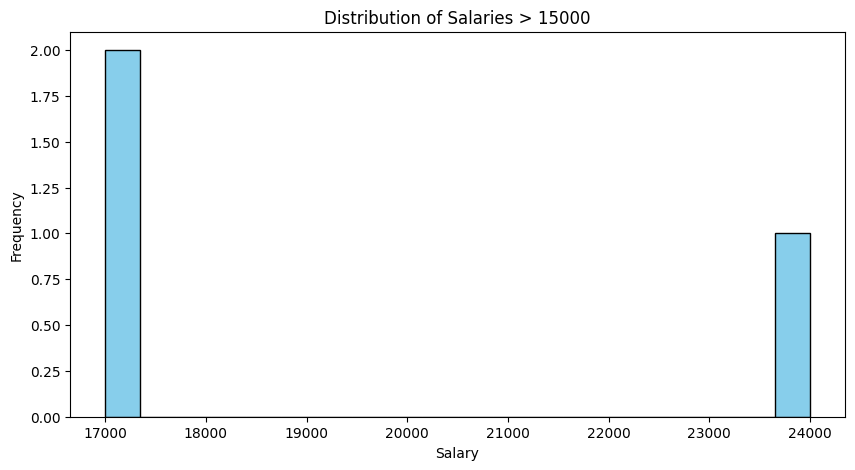

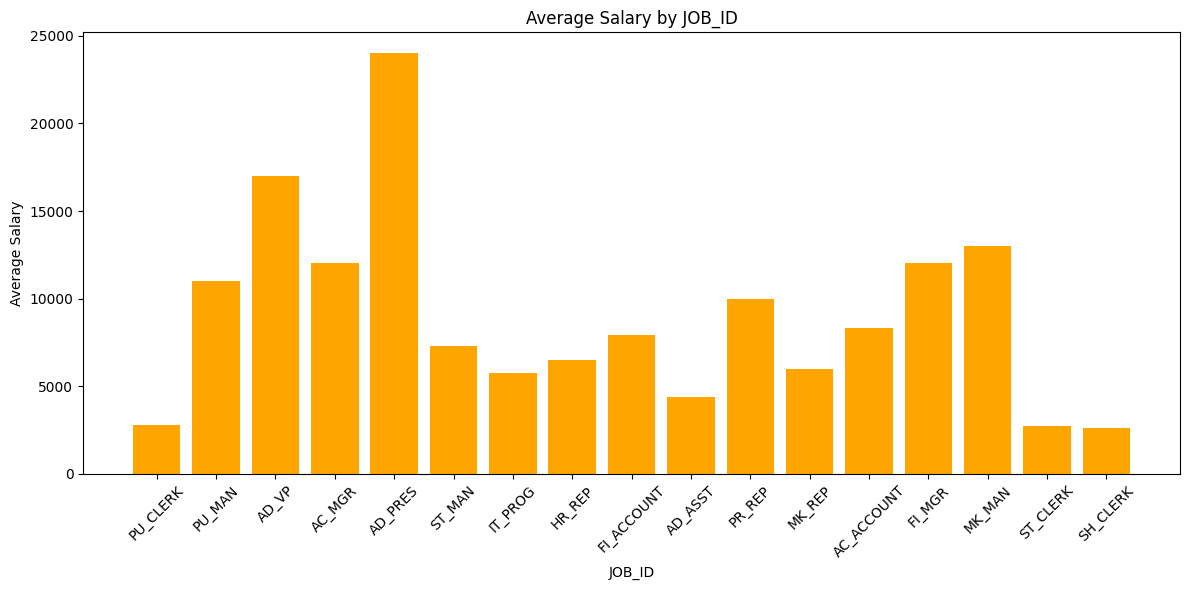

In [0]:
import matplotlib.pyplot as plt

salary_df = df.filter(df.Salary > 15000).toPandas()
avg_salary_df = df.groupBy("JOB_ID").avg("Salary").toPandas()

plt.figure(figsize=(10, 5))
plt.hist(salary_df['Salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries > 15000')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(avg_salary_df['JOB_ID'], avg_salary_df['avg(Salary)'], color='orange')
plt.title('Average Salary by JOB_ID')
plt.xlabel('JOB_ID')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()